# Check data
- Visualize parking image and marker point

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image dimensions: (600, 600, 3)


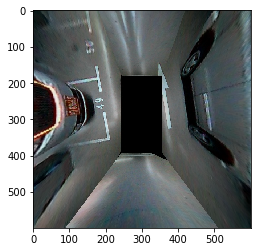

In [2]:
# read image
src = cv2.imread('img/20161019-1-1.bmp')
print('Image dimensions:', src.shape)
plt.imshow(src)

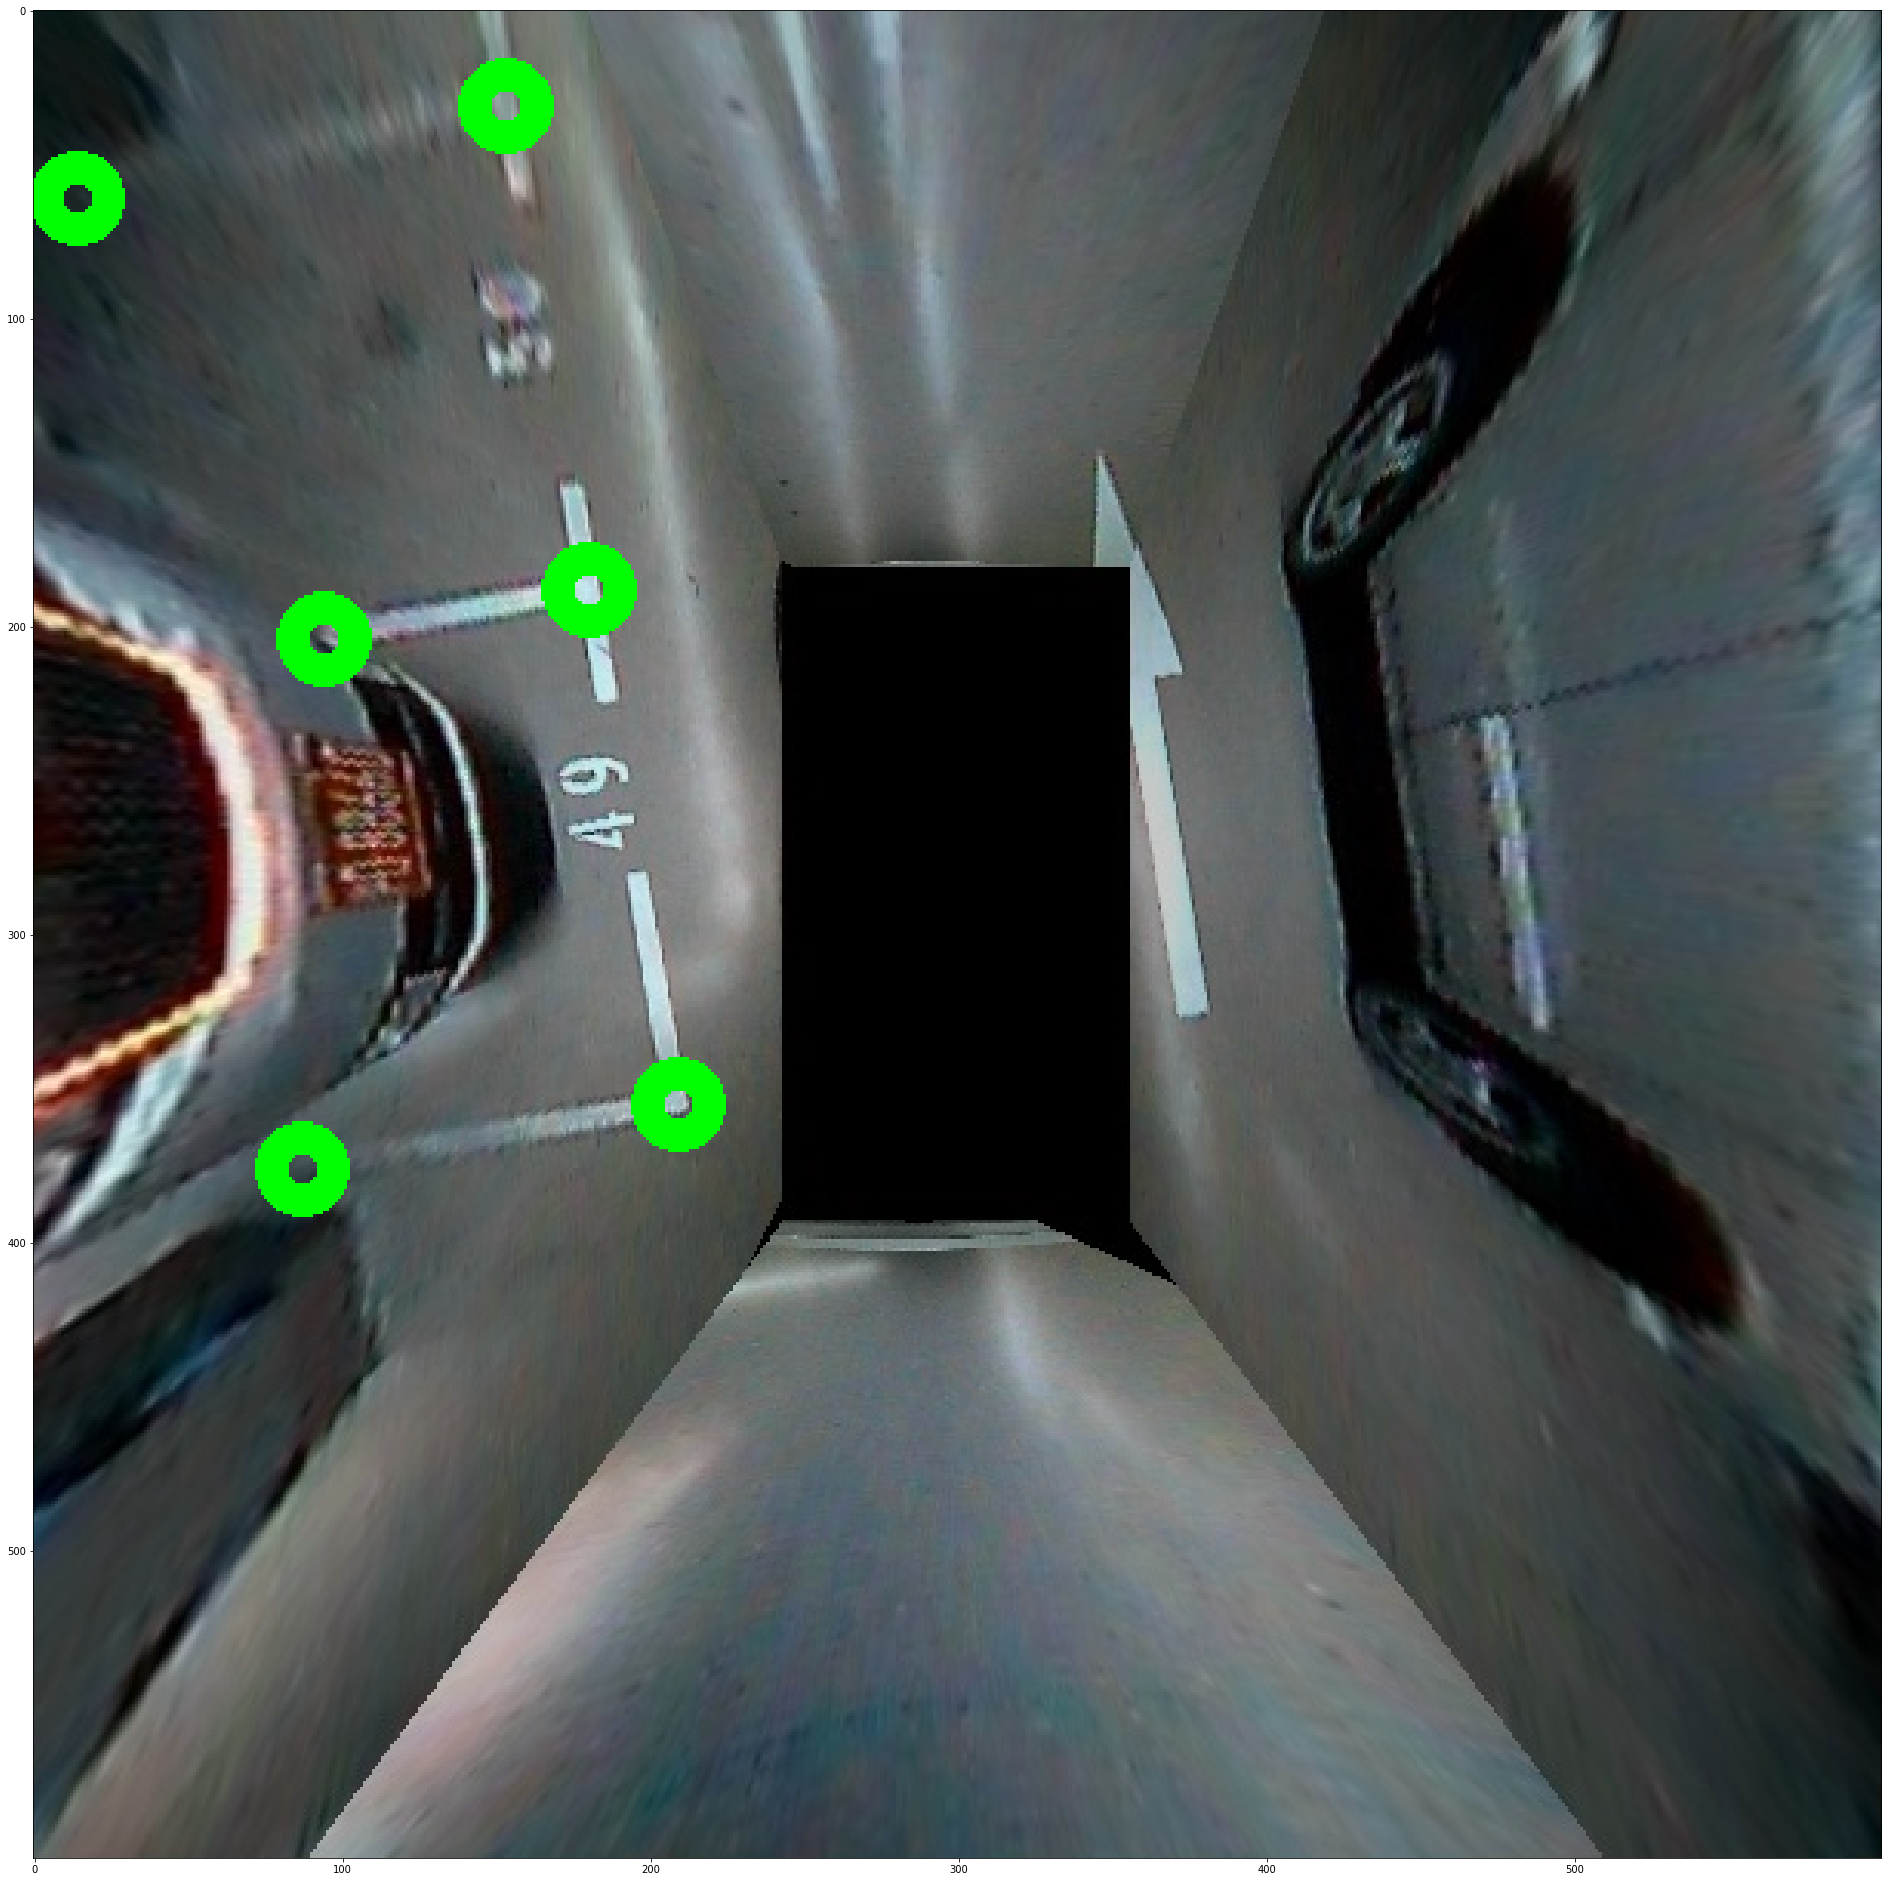

In [169]:
# visualaize marker points
img = np.copy(src)
cv2.circle( img, (209, 355), 10, (0,255,0), 10)
cv2.circle( img, (87, 376), 10, (0,255,0), 10)

cv2.circle( img, (180, 188), 10, (0,255,0), 10)
cv2.circle( img, (94, 204), 10, (0,255,0), 10)

cv2.circle( img, (153, 31), 10, (0,255,0), 10)
cv2.circle( img, (14, 61), 10, (0,255,0), 10)

plt.imshow(img)

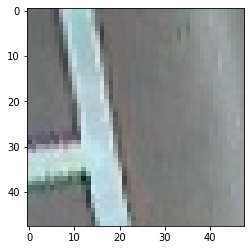

In [14]:
# find patch
n = 24
patch = src[180-n:180+n, 188-n:188+n]
plt.imshow(patch)